In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [15]:
# Save references to each table
Measurement = Base.classes.measurement

Station = Base.classes.station

In [16]:
# For reference

first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x202f7dc5490>,
 'prcp': 0.08,
 'id': 1,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01'}

In [17]:
# For reference

first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x202f7dc5c70>,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0}

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [21]:
# Find the most recent date in the data set.
recent = session.query(func.max(Measurement.date)).first()
recent[0]

'2017-08-23'

In [126]:
recent_convert = dt.datetime.strptime(recent[0], '%Y-%m-%d')
query_date = (recent_convert - dt.timedelta(days=365)).date()
query_date

datetime.date(2016, 8, 23)

In [120]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.\
# Calculate the date one year from the last date in data set.

### https://stackoverflow.com/questions/58785200/how-do-i-determine-one-year-prior-to-a-given-date-2017-08-23-with-python-datetim
recent_convert = dt.datetime.strptime(recent[0], '%Y-%m-%d')
query_date = (recent_convert - dt.timedelta(days=365)).date()
# query_date

# Perform a query to retrieve the data and precipitation scores
query = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= query_date)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(queryresult, columns=['Date','Precipitation'])


# Sort the dataframe by date
df.sort_values(by='Date')
df.dropna()
df.set_index("Date", inplace=True)



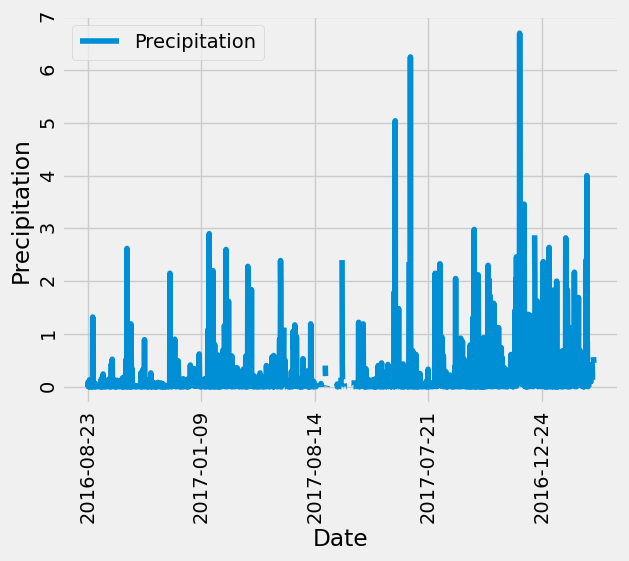

In [125]:
# Use Pandas Plotting with Matplotlib to plot the data
#df.set_index('stock', inplace=True)

# plt.xticks(rotation=90)
df.plot()
plt.tick_params(labelrotation=90)
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.show()

In [66]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [67]:
# Design a query to calculate the total number of stations in the dataset
count = session.query(Station.id).count() 
count

9

In [73]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)

# List the stations and their counts in descending order.
activity = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [87]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station = 'USC00519281'

# I know I can consolidate this but I chose not to so I can spell it out very clearly. 
low_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == station).all()
high_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == station).all()
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == station).all()

temps = (low_temp[0][0], high_temp[0][0], avg_temp[0][0])

temps

(54.0, 85.0, 71.66378066378067)

<Axes: ylabel='Frequency'>

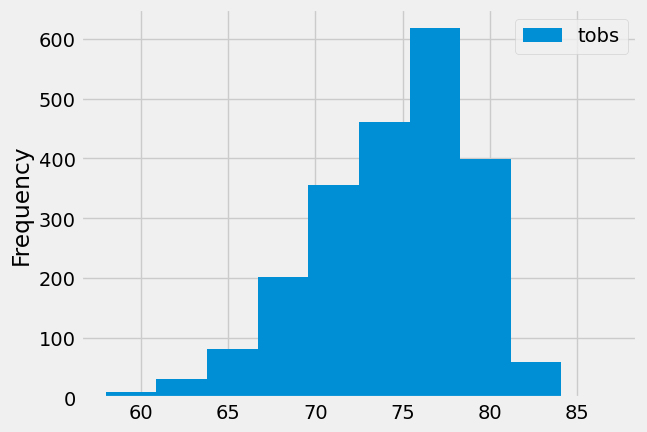

In [104]:
# Using the most active station id

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date.between("2016-08-24", recent[0])).all()

df2 = pd.DataFrame(results)
df2.plot.hist()

# Close Session

In [105]:
# Close Session
session.close()